In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar, desde su ubicación, los datos de las empresas de 50 a 499 trabajadores que SI dieron formación
df_formacion_empresasMG = pd.read_csv("DF-RRHH_22072025_7.csv")  # Poner la ruta del archivo DF-RRHH_22072025_7.csv

In [3]:
print("=== INFORMACIÓN BÁSICA DEL DATASET ===")
print(f"Dimensiones: {df_formacion_empresasMG.shape}")
print(f"Columnas: {df_formacion_empresasMG.columns.tolist()}")
print()

print("=== PRIMERAS FILAS ===")
print(df_formacion_empresasMG.head())
print()

print("=== INFORMACIÓN DE TIPOS DE DATOS ===")
print(df_formacion_empresasMG.info())
print()

print("=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df_formacion_empresasMG.describe())
print()

=== INFORMACIÓN BÁSICA DEL DATASET ===
Dimensiones: (42, 9)
Columnas: ['anio', 'motivo', 'nada', 'poco', 'bastante', 'mucho', 'total%', 'total_cias', 'formacion']

=== PRIMERAS FILAS ===
   anio                                             motivo  nada  poco  \
0  2019  El nivel de formación de los empleados era el ...  12.4  37.4   
1  2019  La estrategia preferida de la empresa fue cont...  18.0  40.8   
2  2019  Dificultad para evaluar la necesidades de form...  28.0  57.5   
3  2019  La falta de cursos de formación adecuados en e...  23.6  50.1   
4  2019           El alto coste de los cursos de formación  16.9  43.9   

   bastante  mucho  total%  total_cias  formacion  
0      42.6    7.6   100.0       20959       True  
1      34.4    6.8   100.0       20959       True  
2      12.9    1.6   100.0       20959       True  
3      22.2    4.1   100.0       20959       True  
4      30.8    8.5   100.0       20959       True  

=== INFORMACIÓN DE TIPOS DE DATOS ===
<class 'pandas.co

In [4]:
# Identificar los motivos que han supuesto una limitación a la formación para empresas que dieron formacion
print("\n=== IDENTIFICACIÓN DE MOTIVOS -  EMPRESAS DE 50 A 499 TRABAJADORES QUE SI DIERON FORMACION ===")
print("Motivos que han supuesto una limitacion a la formacion:")
for i, motivo in enumerate(df_formacion_empresasMG['motivo'].unique(), 1):
    print(f"{i}. {motivo}")


=== IDENTIFICACIÓN DE MOTIVOS -  EMPRESAS DE 50 A 499 TRABAJADORES QUE SI DIERON FORMACION ===
Motivos que han supuesto una limitacion a la formacion:
1. El nivel de formación de los empleados era el apropiado para las necesidades de la empresa
2. La estrategia preferida de la empresa fue contratar personal con la cualificación, habilidades o competencias requeridas
3. Dificultad para evaluar la necesidades de formación de la empresa
4. La falta de cursos de formación adecuados en el mercado
5. El alto coste de los cursos de formación
6. El mayor esfuerzo realizado en años anteriores para ofrecer formación a sus trabajadores
7. La elevada carga de trabajo y el escaso tiempo disponible de los empleados de su empresa
8. Dificultad para acceder a ayudas o subvenciones públicas
9. La empresa prefirió contratar a personal con la cualificación, habilidades y competencias necesarias 
10. La empresa prefirió tener personal con contratos formativos o personal en formación por convenio de Forma

In [5]:
print("=== VALORES ÚNICOS POR COLUMNA ===")
for col in df_formacion_empresasMG.columns:
    print(f"{col}: {df_formacion_empresasMG[col].nunique()} valores únicos")
    if df_formacion_empresasMG[col].nunique() < 10:
        print(f"  Valores: {df_formacion_empresasMG[col].unique()}")
print()

=== VALORES ÚNICOS POR COLUMNA ===
anio: 5 valores únicos
  Valores: [2019 2020 2021 2022 2023]
motivo: 11 valores únicos
nada: 38 valores únicos
poco: 39 valores únicos
bastante: 39 valores únicos
mucho: 36 valores únicos
total%: 1 valores únicos
  Valores: [100.]
total_cias: 5 valores únicos
  Valores: [20959 18932 19490 21497 22869]
formacion: 1 valores únicos
  Valores: [ True]



In [6]:
print("=== VERIFICAR VALORES NULOS ===")
print(df_formacion_empresasMG.isnull().sum())
print()

=== VERIFICAR VALORES NULOS ===
anio          0
motivo        0
nada          0
poco          0
bastante      0
mucho         0
total%        0
total_cias    0
formacion     0
dtype: int64



In [ ]:
# --- ANÁLISIS DE BARRERAS MÁS IMPORTANTES - EMPRESAS 50 A 499 TRABAJADORES QUE SI DIERON FORMACION ---

# Crear una columna ·alta_importancia" que combine "bastante" + "mucho" para cada motivo
df_formacion_empresasMG['alta_importancia'] = df_formacion_empresasMG['bastante'] + df_formacion_empresasMG['mucho']

# Ver una muestra de los datos para entender mejor los motivos
print("=== MUESTRA DE DATOS - EMPRESAS 50 A 499 TRABAJADORES QUE SI DIERON FORMACION ===")
print(df_formacion_empresasMG[['anio', 'motivo', 'bastante', 'mucho', 'alta_importancia']].head(10))

=== MUESTRA DE DATOS - EMPRESAS 50 A 499 TRABAJADORES QUE SI DIERON FORMACION ===
   anio                                             motivo  bastante  mucho  \
0  2019  El nivel de formación de los empleados era el ...      42.6    7.6   
1  2019  La estrategia preferida de la empresa fue cont...      34.4    6.8   
2  2019  Dificultad para evaluar la necesidades de form...      12.9    1.6   
3  2019  La falta de cursos de formación adecuados en e...      22.2    4.1   
4  2019           El alto coste de los cursos de formación      30.8    8.5   
5  2019  El mayor esfuerzo realizado en años anteriores...      21.6    2.7   
6  2019  La elevada carga de trabajo y el escaso tiempo...      44.4   21.1   
7  2019  Dificultad para acceder a ayudas o subvencione...      21.9    7.8   
8  2020  El nivel de formación de los empleados era el ...      56.1    9.2   
9  2020  La estrategia preferida de la empresa fue cont...      32.2    6.0   

   alta_importancia  
0              50.2  
1   

In [8]:
# Análisis por motivo (promedio de todos los años)
print("\n=== TOP BARRERAS POR IMPORTANCIA ALTA (BASTANTE + MUCHO) \nEMPRESAS 50 A 499 TRABAJADORES QUE SI DIERON FORMACION ===")
barreras_por_motivo = df_formacion_empresasMG.groupby('motivo').agg({
    'bastante': 'mean',
    'mucho': 'mean', 
    'alta_importancia': 'mean',
    'total_cias': 'mean'
}).round(1)

# Ordenar por alta importancia descendente
barreras_ordenadas = barreras_por_motivo.sort_values('alta_importancia', ascending=False)
print(barreras_ordenadas)


=== TOP BARRERAS POR IMPORTANCIA ALTA (BASTANTE + MUCHO) 
EMPRESAS 50 A 499 TRABAJADORES QUE SI DIERON FORMACION ===
                                                    bastante  mucho  \
motivo                                                                
El nivel de formación de los empleados era el a...      53.1    8.6   
La elevada carga de trabajo y el escaso tiempo ...      42.1   14.1   
La empresa prefirió contratar a personal con la...      40.1    8.6   
La estrategia preferida de la empresa fue contr...      36.5    6.2   
El alto coste de los cursos de formación                29.6    7.7   
Dificultad para acceder a ayudas o subvenciones...      21.9    6.3   
El mayor esfuerzo realizado en años anteriores ...      22.4    2.1   
La falta de cursos de formación adecuados en el...      19.8    3.6   
Dificultad para evaluar la necesidades de forma...      13.9    1.5   
Otras razones                                            6.5    2.0   
La empresa prefirió tener pers

In [9]:
# Top 5 barreras más importantes - EMPRESAS QUE DAN FORMACION
print("\n=== TOP 5 BARRERAS MÁS IMPORTANTES - EMPRESAS QUE DIERON FORMACION ===")
top_5 = barreras_ordenadas.head(5)
for i, (motivo, row) in enumerate(top_5.iterrows(), 1):
    print(f"{i}. {motivo}")
    print(f"   - Alta importancia: {row['alta_importancia']:.1f}% (Bastante: {row['bastante']:.1f}% + Mucho: {row['mucho']:.1f}%)")
    print(f"   - Empresas promedio: {row['total_cias']:.0f}")
    print()


=== TOP 5 BARRERAS MÁS IMPORTANTES - EMPRESAS QUE DIERON FORMACION ===
1. El nivel de formación de los empleados era el apropiado para las necesidades de la empresa
   - Alta importancia: 61.6% (Bastante: 53.1% + Mucho: 8.6%)
   - Empresas promedio: 20749

2. La elevada carga de trabajo y el escaso tiempo disponible de los empleados de su empresa
   - Alta importancia: 56.2% (Bastante: 42.1% + Mucho: 14.1%)
   - Empresas promedio: 20749

3. La empresa prefirió contratar a personal con la cualificación, habilidades y competencias necesarias 
   - Alta importancia: 48.7% (Bastante: 40.1% + Mucho: 8.6%)
   - Empresas promedio: 22869

4. La estrategia preferida de la empresa fue contratar personal con la cualificación, habilidades o competencias requeridas
   - Alta importancia: 42.7% (Bastante: 36.5% + Mucho: 6.2%)
   - Empresas promedio: 20220

5. El alto coste de los cursos de formación
   - Alta importancia: 37.3% (Bastante: 29.6% + Mucho: 7.7%)
   - Empresas promedio: 20749



In [10]:
# Evolución temporal de las top 5 barreras
print("=== EVOLUCIÓN TEMPORAL DE LAS TOP 5 BARRERAS\n EMPRESAS QUE DIERON FORMACION ===")
top_5_motivos = barreras_ordenadas.head(5).index.tolist()

for motivo in top_5_motivos:
    print(f"\n--- {motivo} ---")
    evolucion = df_formacion_empresasMG[df_formacion_empresasMG['motivo'] == motivo][['anio', 'bastante', 'mucho', 'alta_importancia']]
    print(evolucion.to_string(index=False))

=== EVOLUCIÓN TEMPORAL DE LAS TOP 5 BARRERAS
 EMPRESAS QUE DIERON FORMACION ===

--- El nivel de formación de los empleados era el apropiado para las necesidades de la empresa ---
 anio  bastante  mucho  alta_importancia
 2019      42.6    7.6              50.2
 2020      56.1    9.2              65.3
 2021      51.2    8.1              59.3
 2022      57.9    8.3              66.2
 2023      57.5    9.6              67.1

--- La elevada carga de trabajo y el escaso tiempo disponible de los empleados de su empresa ---
 anio  bastante  mucho  alta_importancia
 2019      44.4   21.1              65.5
 2020      40.9   11.4              52.3
 2021      39.1   13.5              52.6
 2022      43.7   11.5              55.2
 2023      42.5   13.0              55.5

--- La empresa prefirió contratar a personal con la cualificación, habilidades y competencias necesarias  ---
 anio  bastante  mucho  alta_importancia
 2023      40.1    8.6              48.7

--- La estrategia preferida de la em

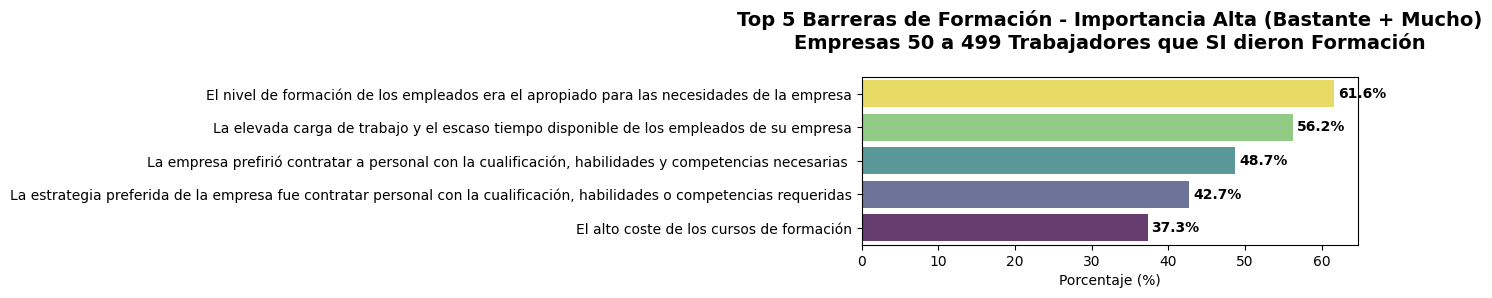

In [ ]:
#Gráfico 1: Top 5 barreras con barras horizontales
plt.subplot(2, 1, 1)
sns.barplot(data=top_5, y='motivo', x='alta_importancia', hue='alta_importancia',legend=False, palette='viridis', alpha=0.8)
plt.title('Top 5 Barreras de Formación - Importancia Alta (Bastante + Mucho)\nEmpresas 50 a 499 Trabajadores que SI dieron Formación', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Porcentaje (%)')
plt.ylabel('')

# Agregar valores al final de cada barra
for i, v in enumerate(top_5['alta_importancia']):
    plt.text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold')


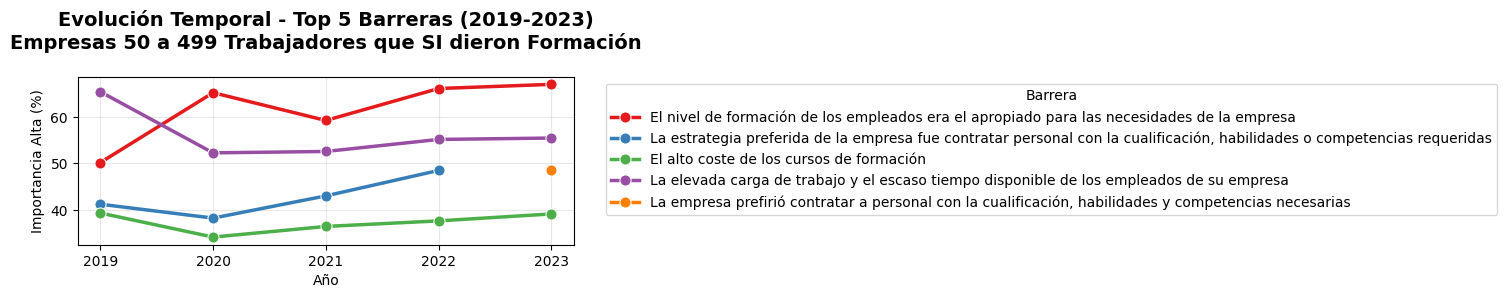

In [ ]:
# Gráfico 2: Evolución temporal de top 5
plt.subplot(2, 1, 2)

top_5_data = df_formacion_empresasMG[df_formacion_empresasMG['motivo'].isin(top_5_motivos[:5])]
sns.lineplot(data=top_5_data, x='anio', y='alta_importancia', hue='motivo', 
             marker='o', linewidth=2.5, markersize=8, palette='Set1')
plt.title('Evolución Temporal - Top 5 Barreras (2019-2023)\nEmpresas 50 a 499 Trabajadores que SI dieron Formación', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Año')
plt.ylabel('Importancia Alta (%)')
plt.legend(title='Barrera', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(top_5_data['anio'].unique())
plt.show()

In [13]:
#top_5_data.to_csv("EvolucionTemporalTop5Barreras_tamaño.csv", index=False)

In [ ]:
# Cargar, desde su ubicación, los datos de empresas de 50 a 499 trabajadores que NO dieron formación
df_no_formacion_empresasMG = pd.read_csv("DF-RRHH_22072025_8.csv")  # Poner la ruta del archivo DF-RRHH_22072025_8.csv

In [15]:
print("=== INFORMACIÓN BÁSICA DEL DATASET ===")
print(f"Dimensiones: {df_no_formacion_empresasMG.shape}")
print(f"Columnas: {df_no_formacion_empresasMG.columns.tolist()}")
print()

print("=== PRIMERAS FILAS ===")
print(df_no_formacion_empresasMG.head())
print()

print("=== INFORMACIÓN DE TIPOS DE DATOS ===")
print(df_no_formacion_empresasMG.info())
print()

print("=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df_no_formacion_empresasMG.describe())
print()

=== INFORMACIÓN BÁSICA DEL DATASET ===
Dimensiones: (48, 9)
Columnas: ['anio', 'motivo', 'nada', 'poco', 'bastante', 'mucho', 'total%', 'total_cias', 'formacion']

=== PRIMERAS FILAS ===
   anio                                             motivo  nada  poco  \
0  2019  El nivel de formación de los empleados era el ...   7.0  13.4   
1  2019  La estrategia preferida de la empresa fue cont...  13.0  16.1   
2  2019  Dificultad para evaluar la necesidades de form...  27.9  47.6   
3  2019  La falta de cursos de formación adecuados en e...  34.7  38.9   
4  2019           El alto coste de los cursos de formación  26.2  54.0   

   bastante  mucho  total%  total_cias  formacion  
0      48.2   31.4   100.0         761      False  
1      53.8   17.0   100.0         761      False  
2      22.6    1.8   100.0         761      False  
3      22.8    3.6   100.0         761      False  
4      15.9    3.9   100.0         761      False  

=== INFORMACIÓN DE TIPOS DE DATOS ===
<class 'pandas.co

In [ ]:
# Identificar los motivos que han supuesto una limitación a la formación para empresas que no dieron formacion
print("\n=== IDENTIFICACIÓN DE MOTIVOS - EMPRESAS DE 50 A 499 TRABAJADORES \n QUE NO DIERON FORMACION ===")
print("Motivos que han supuesto una limitacion a la formacion:")
for i, motivo in enumerate(df_no_formacion_empresasMG['motivo'].unique(), 1):
    print(f"{i}. {motivo}")


=== IDENTIFICACIÓN DE MOTIVOS - EMPRESAS DE 50 A 499 TRABAJADORES 
 QUE NO DIERON FORMACION ===
Motivos que han supuesto una limitacion a la formacion:
1. El nivel de formación de los empleados era el apropiado para las necesidades de la empresa
2. La estrategia preferida de la empresa fue contratar personal con la cualificación, habilidades o competencias requeridas
3. Dificultad para evaluar la necesidades de formación de la empresa
4. La falta de cursos de formación adecuados en el mercado
5. El alto coste de los cursos de formación
6. El mayor esfuerzo realizado en años anteriores para ofrecer formación a sus trabajadores
7. La elevada carga de trabajo y el escaso tiempo disponible de los empleados de su empresa
8. Dificultad para acceder a ayudas o subvenciones públicas
9. La empresa prefirió tener personal con contrato de formación y aprendizaje o formación por convenio de formación profesional dual
10. Cancelación o aplazamiento de las actividades de formación debido a las rest

In [17]:
print("=== VALORES ÚNICOS POR COLUMNA ===")
for col in df_no_formacion_empresasMG.columns:
    print(f"{col}: {df_no_formacion_empresasMG[col].nunique()} valores únicos")
    if df_no_formacion_empresasMG[col].nunique() < 10:
        print(f"  Valores: {df_no_formacion_empresasMG[col].unique()}")
print()

=== VALORES ÚNICOS POR COLUMNA ===
anio: 5 valores únicos
  Valores: [2019 2020 2021 2022 2023]
motivo: 13 valores únicos
nada: 45 valores únicos
poco: 46 valores únicos
bastante: 45 valores únicos
mucho: 41 valores únicos
total%: 4 valores únicos
  Valores: [100.  100.1 100.2 100.3]
total_cias: 5 valores únicos
  Valores: [ 761 1861 1646 1250 1322]
formacion: 1 valores únicos
  Valores: [False]



In [18]:
print("=== VERIFICAR VALORES NULOS ===")
print(df_no_formacion_empresasMG.isnull().sum())
print()

=== VERIFICAR VALORES NULOS ===
anio          0
motivo        0
nada          0
poco          0
bastante      0
mucho         0
total%        0
total_cias    0
formacion     0
dtype: int64



In [ ]:
# --- ANÁLISIS DE BARRERAS MÁS IMPORTANTES ---

# Crear una columna "ALTA_IMPORTANCIA" que combine "bastante" + "mucho" para cada motivo
df_no_formacion_empresasMG['alta_importancia'] = df_no_formacion_empresasMG['bastante'] + df_no_formacion_empresasMG['mucho']
print("=== MUESTRA DE DATOS ===")
df_no_formacion_empresasMG[['anio', 'motivo', 'bastante', 'mucho', 'alta_importancia']].head(10)

=== MUESTRA DE DATOS ===


,anio,motivo,bastante,mucho,alta_importancia
0,2019,El nivel de formación de los empleados era el ...,48.2,31.4,79.6
1,2019,La estrategia preferida de la empresa fue cont...,53.8,17.0,70.8
2,2019,Dificultad para evaluar la necesidades de form...,22.6,1.8,24.4
3,2019,La falta de cursos de formación adecuados en e...,22.8,3.6,26.4
4,2019,El alto coste de los cursos de formación,15.9,3.9,19.8
5,2019,El mayor esfuerzo realizado en años anteriores...,26.7,0.0,26.7
6,2019,La elevada carga de trabajo y el escaso tiempo...,35.9,23.9,59.8
7,2019,Dificultad para acceder a ayudas o subvencione...,25.4,8.0,33.4
8,2020,El nivel de formación de los empleados era el ...,44.8,22.4,67.2
9,2020,La estrategia preferida de la empresa fue cont...,27.3,16.4,43.7


In [20]:
# Análisis por motivo (promedio de todos los años)
print("\n=== TOP BARRERAS POR IMPORTANCIA ALTA (BASTANTE + MUCHO) - EMPRESAS QUE NO DAN FORMACION ===")
barreras_por_motivo_nf = df_no_formacion_empresasMG.groupby('motivo').agg({
    'bastante': 'mean',
    'mucho': 'mean', 
    'alta_importancia': 'mean',
    'total_cias': 'mean'
}).round(1)

# Ordenar por alta importancia descendente
barreras_ordenadas_nf = barreras_por_motivo_nf.sort_values('alta_importancia', ascending=False)
print(barreras_ordenadas_nf)


=== TOP BARRERAS POR IMPORTANCIA ALTA (BASTANTE + MUCHO) - EMPRESAS QUE NO DAN FORMACION ===
                                                    bastante  mucho  \
motivo                                                                
El nivel de formación de los empleados era el a...      48.2   24.4   
La estrategia preferida de la empresa fue contr...      40.0   16.6   
La empresa prefirió contratar a personal con la...      35.2   19.2   
La elevada carga de trabajo y el escaso tiempo ...      34.7   15.0   
Dificultad para acceder a ayudas o subvenciones...      21.0    7.6   
El alto coste de los cursos de formación                20.4    6.0   
La falta de cursos de formación adecuados en el...      18.8    5.8   
Cancelación o aplazamiento de las actividades d...      16.7    7.5   
El mayor esfuerzo realizado en años anteriores ...      20.4    3.1   
Dificultad para evaluar la necesidades de forma...      19.8    2.7   
Otras razones                                         

In [ ]:
# Top 5 barreras más importantes - EMPRESAS QUE NO DAN FORMACION
print("\n=== TOP 5 BARRERAS MÁS IMPORTANTES - EMPRESAS QUE NO DIERON FORMACION ===")
top_5_nf = barreras_ordenadas_nf.head(5)
for i, (motivo, row) in enumerate(top_5_nf.iterrows(), 1):
    print(f"{i}. {motivo}")
    print(f"   - Alta importancia: {row['alta_importancia']:.1f}% (Bastante: {row['bastante']:.1f}% + Mucho: {row['mucho']:.1f}%)")
    print(f"   - Empresas promedio: {row['total_cias']:.0f}")
    print()


=== TOP 5 BARRERAS MÁS IMPORTANTES - EMPRESAS QUE NO DIERON FORMACION ===
1. El nivel de formación de los empleados era el apropiado para las necesidades de la empresa
   - Alta importancia: 72.6% (Bastante: 48.2% + Mucho: 24.4%)
   - Empresas promedio: 1368

2. La estrategia preferida de la empresa fue contratar personal con la cualificación, habilidades o competencias requeridas
   - Alta importancia: 56.5% (Bastante: 40.0% + Mucho: 16.6%)
   - Empresas promedio: 1380

3. La empresa prefirió contratar a personal con la cualificación, habilidades y competencias necesarias 
   - Alta importancia: 54.4% (Bastante: 35.2% + Mucho: 19.2%)
   - Empresas promedio: 1322

4. La elevada carga de trabajo y el escaso tiempo disponible de los empleados de su empresa
   - Alta importancia: 49.7% (Bastante: 34.7% + Mucho: 15.0%)
   - Empresas promedio: 1368

5. Dificultad para acceder a ayudas o subvenciones públicas
   - Alta importancia: 28.6% (Bastante: 21.0% + Mucho: 7.6%)
   - Empresas promedi

In [22]:
# Evolución temporal de las top 5 barreras
print("=== EVOLUCIÓN TEMPORAL DE LAS TOP 5 BARRERAS - EMPRESAS QUE NO DIERON FORMACION===")
top_5_motivos_nf = barreras_ordenadas_nf.head(5).index.tolist()

for motivo in top_5_motivos_nf:
    print(f"\n--- {motivo} ---")
    evolucion_nf = df_no_formacion_empresasMG[df_no_formacion_empresasMG['motivo'] == motivo][['anio', 'bastante', 'mucho', 'alta_importancia']]
    print(evolucion_nf.to_string(index=False))

=== EVOLUCIÓN TEMPORAL DE LAS TOP 5 BARRERAS - EMPRESAS QUE NO DIERON FORMACION===

--- El nivel de formación de los empleados era el apropiado para las necesidades de la empresa ---
 anio  bastante  mucho  alta_importancia
 2019      48.2   31.4              79.6
 2020      44.8   22.4              67.2
 2021      45.2   21.0              66.2
 2022      56.5   18.3              74.8
 2023      46.1   29.0              75.1

--- La estrategia preferida de la empresa fue contratar personal con la cualificación, habilidades o competencias requeridas ---
 anio  bastante  mucho  alta_importancia
 2019      53.8   17.0              70.8
 2020      27.3   16.4              43.7
 2021      36.9   15.8              52.7
 2022      41.9   17.0              58.9

--- La empresa prefirió contratar a personal con la cualificación, habilidades y competencias necesarias  ---
 anio  bastante  mucho  alta_importancia
 2023      35.2   19.2              54.4

--- La elevada carga de trabajo y el escas

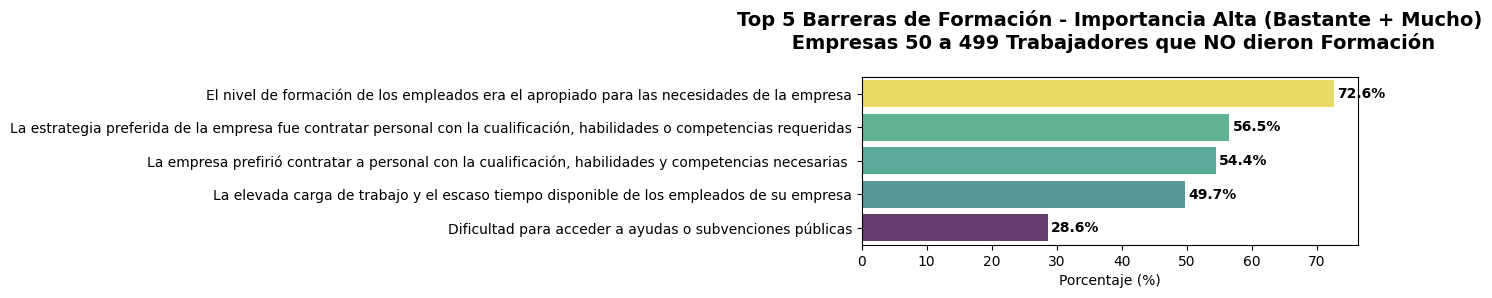

In [ ]:
#Gráfico 1: Top 5 barreras con barras horizontales
plt.subplot(2, 1, 1)
sns.barplot(data=top_5_nf, y='motivo', x='alta_importancia', hue='alta_importancia',legend=False, palette='viridis', alpha=0.8)
plt.title('Top 5 Barreras de Formación - Importancia Alta (Bastante + Mucho)\n Empresas '
          '50 a 499 Trabajadores que NO dieron Formación', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Porcentaje (%)')
plt.ylabel('')

# Agregar valores al final de cada barra
for i, v in enumerate(top_5_nf['alta_importancia']):
    plt.text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold')


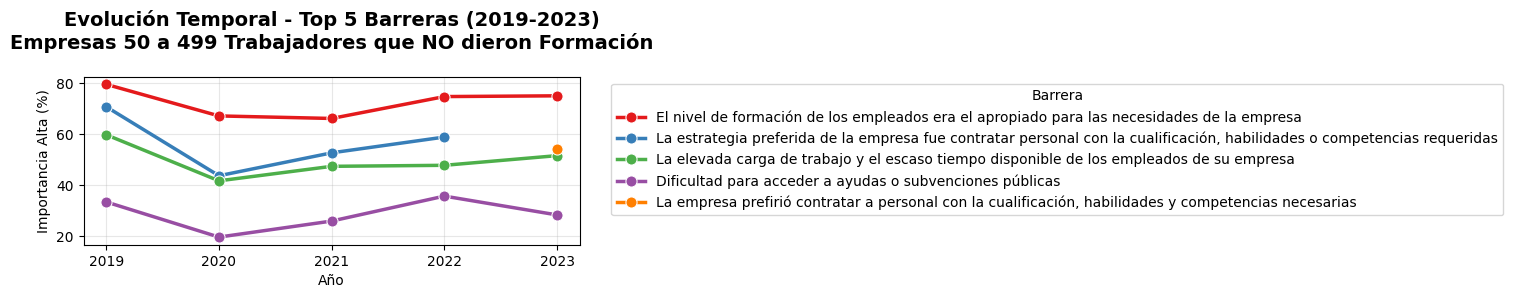

In [ ]:
# Gráfico 2: Evolución temporal de top 5
plt.subplot(2, 1, 2)
top_5_data_nf = df_no_formacion_empresasMG[df_no_formacion_empresasMG['motivo'].isin(top_5_motivos_nf[:5])]
sns.lineplot(data=top_5_data_nf, x='anio', y='alta_importancia', hue='motivo', 
             marker='o', linewidth=2.5, markersize=8, palette='Set1')
plt.title('Evolución Temporal - Top 5 Barreras (2019-2023)\nEmpresas 50 a 499 Trabajadores que NO dieron Formación', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Año')
plt.ylabel('Importancia Alta (%)')
plt.legend(title='Barrera', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(top_5_data_nf['anio'].unique())
plt.show()